Goes through the process of downloading data from the 2018 Amazon dataset
and places it locally in a SQlite Database for further processing

In [1]:
from datetime import date
from pathlib import Path
from typing import List

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px
import math
import numpy as np

import amazon_dataset

# 1. Download Data

Those are the dataset. In this notebook we process one dataset at a time

In [2]:
DATASETS = [
    # 'Baby',
    'Clothing_Shoes_and_Jewelry',
    # 'Home_and_Kitchen',
    # 'Movies_and_TV',
    # 'Musical_Instruments',
    # 'Office_Products',
    # 'Sports_and_Outdoors',
    # 'Toys_and_Games',
]

# 2. Import data to database

In [3]:
DATASET =  'Clothing_Shoes_and_Jewelry'

In [4]:
try:
    amazon_dataset.load_amazon_dataset(
        DATASET,
        force=False,
        min_date=date.fromisoformat('2018-03-01'),
        max_date=date.fromisoformat('2018-10-01'),
        min_reviews_per_reviewer=5,
        min_reviews_per_asin=5
    )
except ValueError as ex:
    # This is OK, since we don't want to blow up the Database. Extracting
    # data can take some minutes
    print(ex)

There are reviews. Use force=True to force removal


In [6]:
reviews = amazon_dataset.reviews_df('Clothing_Shoes_and_Jewelry')
print(f"There are {len(reviews)} reviews in the dataset.")
reviews.sample(n=5)

There are 178944 reviews in the dataset.


,id,asin,reviewerID,reviewerName,overall,text,reviewTime,summary,verified,vote
146748,25032044,B009RA6LKC,A1HP3HQCD9W7Z4,Chris Fredenburg,5.0,"Material soft and comfortable, fits as expecte...",2018-04-24,Five Stars,True,NaN
20308,2733403,B0018OHL5E,ADZL2S29AGIU7,joe van de veere,1.0,Chinese crap. NOTHING like the quality you ex...,2018-05-12,Levi Strauss is spinning in his grave.,True,NaN
177652,32156619,B01GKQIGQM,A1UME1N4FM6ERA,Healing,5.0,Too small in the calves but great quality mate...,2018-05-14,Five Stars,True,NaN
96261,18418624,B0113OB89S,A1IZHEUFB0RO2Z,Ashley,5.0,Super comfortable! Slightly tight around arch ...,2018-04-30,Five Stars,True,NaN
125507,21751411,B01DZVY2EK,A1QC1HQHXR8RPH,jackie harper,4.0,Fast delivery and was exactly what the descrip...,2018-03-26,Fast delivery and was exactly what the descrip...,True,NaN


In [7]:
products = amazon_dataset.products_df(DATASET)
print(f"There are {len(products)} products in the dataset.")
products.sample(n=3)

There are 38493 products in the dataset.


,asin,description,title,brand,main_cat,rank,price,image_slug,image_url,feature,category,tech_detail
id,,,,,,,,,,,,
2299644,B018GX2MY4,"3.7 oz., 55/45 cotton/polyester, 30 singles. 1...",MV Sport-Ladies' Hailey Henley 3/4 Sleeve T-Sh...,MV Sport,None,"135,943inClothing,ShoesJewelry(",$13.30 - $25.95,[51xyOTxII0L],[https://m.media-amazon.com/images/I/51xyOTxII...,"[3.7 oz., 55/45 cotton/polyester, 30 singles.,...","[Clothing, Shoes & Jewelry, Women, Clothing, T...",None
1730761,B00S3RQBQE,A simple but intricate design to suit any woma...,Maikun Round Rhinestone Brooch Scarf Ring Chri...,Maikun,None,"192,960inClothing,ShoesJewelry(",$8.99,[51OF1LvajdL],[https://m.media-amazon.com/images/I/51OF1Lvaj...,"[A beautiful accessory for any occasion, ideal...","[Clothing, Shoes & Jewelry, Novelty & More, Je...",None
257701,B0042AA5XQ,None,Grey's Anatomy Women's 4232 Drawstring Scrub Pant,None,None,"1,356inClothing,ShoesJewelry(",$11.99 - $64.95,[31-PL06dzPL],[https://m.media-amazon.com/images/I/31-PL06dz...,"[77% Polyester, 23% Rayon, Hand Wash, Five-poc...","[Clothing, Shoes & Jewelry, Women, Uniforms, W...",None


In [28]:
some_product = products.sample(n=1).iloc[0]
some_product

asin                                                  B00HF4TCG2
description    Ready for hiking, this shoe gives you the comf...
title          Merrell Men_s Moab Rover Hiking Shoes  Durable...
brand                                                    Merrell
main_cat                                                    None
rank                             349,932inClothing,ShoesJewelry(
price                                           $79.00 - $373.20
image_slug                                         [41F73rRem5L]
image_url      [https://m.media-amazon.com/images/I/41F73rRem...
feature        [100% Leather, Imported, Synthetic sole, Packa...
category       [Clothing, Shoes & Jewelry, Men, Shoes, Athlet...
tech_detail                                                 None
Name: 1157331, dtype: object

In [37]:
for x, y in some_product.items():
    print(f"{x}\t{y}")

asin	B00HF4TCG2
description	Ready for hiking, this shoe gives you the comfort you rely on. Leather and textile uppers add sophistication to rugged practicality.
title	Merrell Men_s Moab Rover Hiking Shoes  Durable and Comfortable in Sophisticated Leather Upper and Abrasion Resistant Fabric
brand	Merrell
main_cat	None
rank	349,932inClothing,ShoesJewelry(
price	$79.00 - $373.20
image_slug	['41F73rRem5L']
image_url	['https://m.media-amazon.com/images/I/41F73rRem5L.SS400.jpg']
feature	['100% Leather', 'Imported', 'Synthetic sole', 'Package Dimensions:\n                    \n12 x 8 x 4 inches', 'Shipping Weight:\n                    \n4 pounds (View shipping rates and policies)']
category	['Clothing, Shoes & Jewelry', 'Men', 'Shoes', 'Athletic', 'Walking']
tech_detail	None


In [47]:
some_images = amazon_dataset.product_images_df(DATASET).sample(n=15)
some_images

,url,main,slug,product_id
id,,,,
381315,https://m.media-amazon.com/images/I/31bLAp2IdG...,True,31bLAp2IdGL,1026111
379645,https://m.media-amazon.com/images/I/41qJGoxIgw...,True,41qJGoxIgwL,907277
371339,https://m.media-amazon.com/images/I/31HTEbAlt-...,True,31HTEbAlt-L,323043
372250,https://m.media-amazon.com/images/I/41KWdQbP9K...,True,41KWdQbP9KL,379962
409539,https://m.media-amazon.com/images/I/51qu6WpAGn...,True,51qu6WpAGnL,2204150
416231,https://m.media-amazon.com/images/I/416pOpzKD-...,True,416pOpzKD-L,2371439
395301,https://m.media-amazon.com/images/I/41cfOHDuq2...,True,41cfOHDuq2L,1766932
415699,https://m.media-amazon.com/images/I/41YtvV9cLk...,True,41YtvV9cLkL,2361982
369102,https://m.media-amazon.com/images/I/31qzn3dCNl...,True,31qzn3dCNlL,196989


Download products images using the Amazon Web Service. 
This process can take around 2 hours and retrieves around 90% of product images

In [13]:
amazon_dataset.download_main_product_images_webservice(DATASET)

100%|██████████| 3642/3642 [07:43<00:00,  7.85image/s, Errors 3642 https://ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=B01HJ0WZ7E&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=SS400]


Then some products won't have images. We can use the first image for each product
to store the product image

This only includes products with at least one parsed image!

In [15]:
amazon_dataset.download_main_image_heuristic(DATASET)

100%|██████████| 33/33 [00:08<00:00,  4.11product/s, Errors 33 product_id=2578953]


A sanity check to double check all images in the image folder are the same in the database

In [17]:
amazon_dataset.check_all_images_are_ok(DATASET)

In [18]:
# Products still with no images at all!
amazon_dataset.products_with_no_main_image_df(DATASET)

,asin,description,title,brand,main_cat,rank,price
id,,,,,,,
3129,B0002NZ87U,"An enduring favorite, our comfortable classic ...",Port Authority® Ladies Silk Touch™ Polo. L500,Port Authority,None,"14,986inClothing,ShoesJewelry(",$11.90 - $70.51
16337,B000BTDP1Q,Gildan is a leading provider of everyday quali...,Gildan Men's Ultra Cotton Tee Extended Sizes,None,None,"2,304inClothing,ShoesJewelry(",$0.11 - $43.03
35790,B000JL2KJE,None,Spiritual Guy Adult Costume,Safari Garden,None,None,None
36528,B000JUFG5K,"Lightweight and comfortable, these gloves are ...",Isotoner Therapeutic Gloves,None,Health & Personal Care,None,$19.50 - $40.05
43534,B000N5CP0U,Comfortable 100% brushed cotton twill. raised ...,Military Caps Vietnam Veteran Logo Baseball Ca...,The Military Trail Gear Shop,None,"56,295inClothing,ShoesJewelry(",$10.60
...,...,...,...,...,...,...,...
2645126,B01GKPS0Y6,Material:100% CottonCondition: 100% brand newS...,Dolphin&Fish Boys Girls Pajamas Toddler Boys S...,None,None,"809,062inClothing,ShoesJewelry(",None
2664148,B01H3AOME4,VamJump Womens Black Casual Zipper Drawstring ...,VamJump Women Sleeveless Zipper Tie Waist One ...,VamJump,None,"1,442,482inClothing,ShoesJewelry(",None
2670342,B01H7DHVQ8,"X-Temp technology adapts to temperature, envir...",KingSize Men's Big & Tall Hanes X-Temp Boxer B...,None,None,"1,169,253inClothing,ShoesJewelry(",None


And there are products with duplicate images

In [28]:
amazon_dataset.delete_non_relevant_images(DATASET)

Deleting non main product images
Getting duplicated product images
Deleting duplicated


In [29]:
amazon_dataset.check_all_images_are_ok(DATASET)

In [32]:
amazon_dataset.vacuum_dataset(DATASET)

# 2. Analyze Data

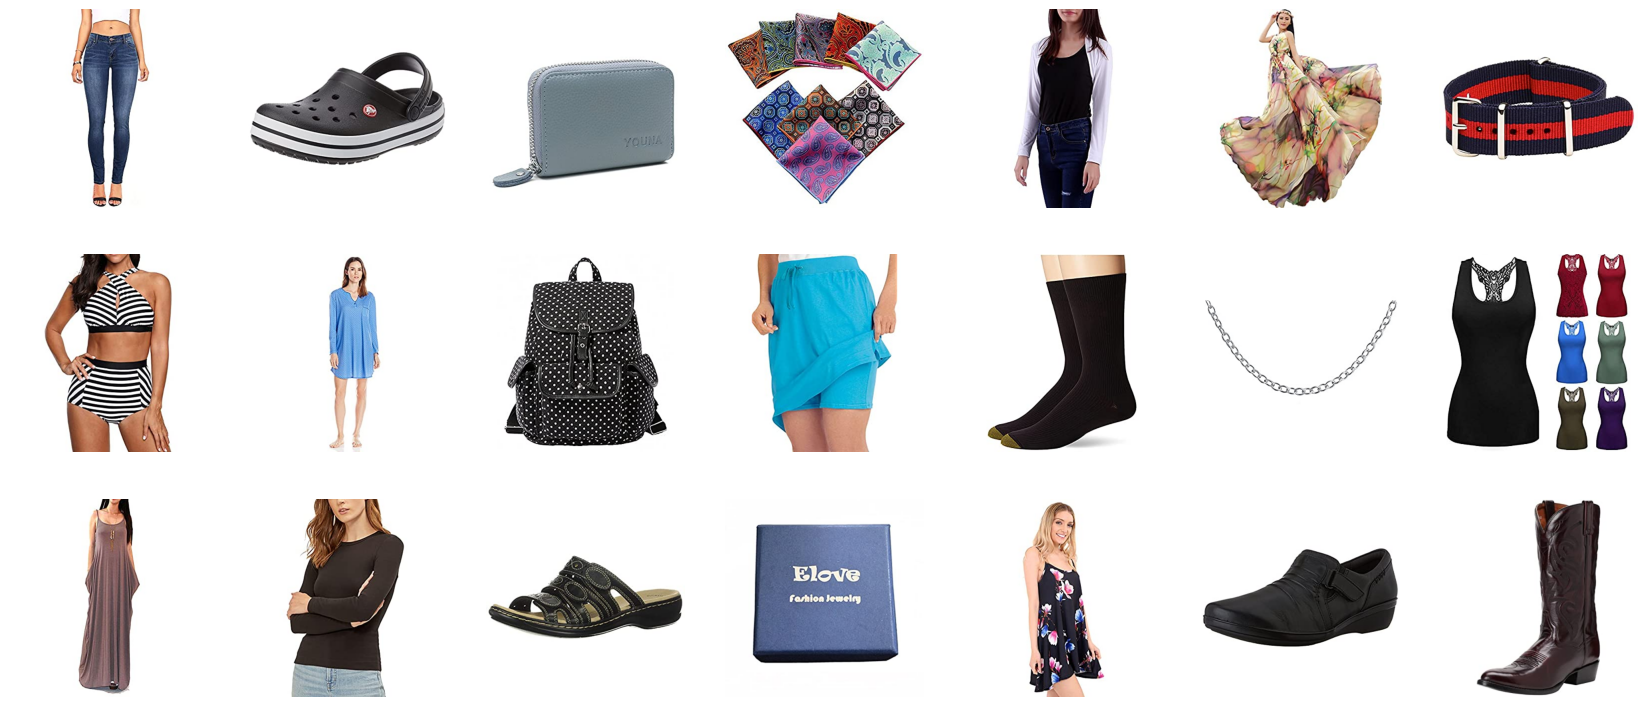

In [69]:
def plot_images(paths: List[Path], titles=None, imgs_per_row=7, figsize=3):
    data = [ mpimg.imread(path) for path in paths]

    if titles is None:
        titles = ['' for _ in range(len(data))]
    
    n_rows = math.ceil(len(data) / imgs_per_row) 
    n_cols = min(imgs_per_row, len(data))

    f, axes = plt.subplots(n_rows,
                           n_cols,
                           squeeze=False,
                           figsize=(figsize*n_cols,figsize*n_rows))

    
    # We don't want ugly axes labels here
    for i in np.ndindex(*axes.shape):
        axes[i].set_axis_off()
    
    for i in range(len(data)):
        row_num = i // imgs_per_row
        row_col = i % imgs_per_row
        axis: Axes = axes[row_num, row_col]
        axis.set_title(titles[i])
        axis.imshow(data[i])
    plt.show()

some_images = amazon_dataset.product_images_df(DATASET).sample(n=21)
plot_images([
    amazon_dataset.product_images_dir(DATASET) / f'{slug}.jpg'
    for slug in some_images['slug']
])

Simple command to debug which variables we have defined

In [34]:
fig = px.histogram(reviews, x="overall", title='Stars per review')
fig.show()

In [35]:
fig = px.bar(
    reviews.groupby('reviewerID')['reviewerID'].count().value_counts(),
    log_y=True,
    title='Users vs Number of Reviews'
)
fig.show()